# AIR bnb :-
# Average Price Analysis
## Finding the Average Price based on room type,neighbourhood and listing id and creating predictive model from the Average Price of listing id which predicts the lodging is Affordable or Expensive.

###### Data Exploration :-Air bnb Dublin,Ireland  url    http://insideairbnb.com/get-the-data.html


In [165]:
# Dependencies and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# machine learning libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [166]:
# csv file path
csv_path_1 = "DATA_price/listings.csv"

In [167]:
# Reading csv file
listings_df = pd.read_csv(csv_path_1)
listings_df

,id,name,neighborhood_overview,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44077,cosy comfortable Irish cottage twin,I like our neighbourhood as there is no shorta...,193005,Teresa,8/6/2010,Dublin Ireland,within an hour,100%,NaN,...,t,f,moderate,t,t,3,0,3,0,2.07
1,85148,Habitación en Dublín Double room,NaN,466111,Don,3/27/2011,"Dublin, Ireland",within a few hours,100%,NaN,...,f,f,flexible,f,f,1,0,1,0,0.15
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,"I love Dundrum and its surrounding areas , The...",193005,Teresa,8/6/2010,Dublin Ireland,within an hour,100%,NaN,...,t,f,moderate,t,t,3,0,3,0,1.64
3,121030,Comfy double room in central area 1,"My neighbourhood is very safe, friendly and o...",608225,Norah,5/20/2011,Dublin Ireland,within a few hours,83%,NaN,...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.07
4,159889,Friendly Single Room,plenty of buses into the city and the area is ...,766611,Margaret,7/1/2011,"Dublin, County Dublin, Ireland",within an hour,100%,NaN,...,t,f,strict_14_with_grace_period,f,t,3,0,3,0,3.25
5,162809,5.5 miles south of Dublin City :^),"Close to the sea, hill walks and the city - vi...",777681,Robbie,7/4/2011,"Dublin, Dublin, Ireland",within a few hours,100%,NaN,...,f,f,moderate,f,f,2,0,2,0,5.01
6,165828,Pádraig Pearse apt. Kilmainham,"Enjoy a walk along the grand canal, or just ob...",790601,Grainne,7/7/2011,"Kerry, Ireland",within a few hours,90%,NaN,...,f,f,strict_14_with_grace_period,f,f,5,5,0,0,0.44
7,165829,"The ""Michael Collins"" apartment","15 minute walk from 'The Dublin', Dublin Disco...",790601,Grainne,7/7/2011,"Kerry, Ireland",within a few hours,90%,NaN,...,f,f,strict_14_with_grace_period,f,f,5,5,0,0,0.53
8,178860,Georgian House in Heart of City Ctr,Our Portobello neighbourhood is an eternally u...,856312,Danielle,7/23/2011,"Dublin, Dublin, Ireland",within an hour,100%,NaN,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,3.48
9,181823,comfy room near beach/town2,"My neighbourhood is very safe, friendly and o...",608225,Norah,5/20/2011,Dublin Ireland,within a few hours,83%,NaN,...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.11


In [168]:
# Renaming column 'id' as 'listing_id'
listings_df_rename = listings_df.rename(columns={"id":"listing_id"})
#listings_df_rename.head()

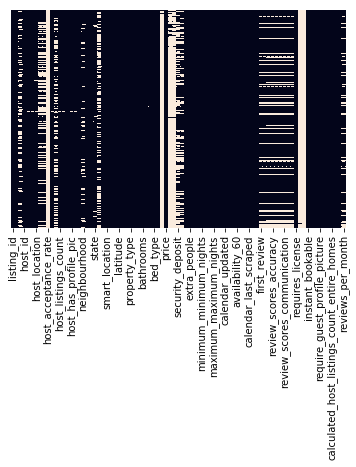

In [169]:
# All rows have null value.So we are selecting the columns needed for analysis and droping the null values.
# heatmap shows the null values
sns.heatmap(listings_df_rename.isnull(),yticklabels=False,cbar=False)

In [170]:
# Select the columns needed for analysis

listings_df_selected_col= listings_df_rename[["listing_id","state","city","neighbourhood","street","property_type","room_type","accommodates","bathrooms","bedrooms","beds","bed_type","latitude","longitude","review_scores_rating","review_scores_cleanliness","cancellation_policy","host_response_time","host_is_superhost","host_listings_count","instant_bookable","cleaning_fee","guests_included","extra_people","price"]]
listings_df_selected_col

,listing_id,state,city,neighbourhood,street,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,cancellation_policy,host_response_time,host_is_superhost,host_listings_count,instant_bookable,cleaning_fee,guests_included,extra_people,price
0,44077,NaN,Churchtown,Churchtown,"Churchtown, Ireland",Bungalow,Private room,2,1.5,1.0,...,10.0,moderate,within an hour,t,3.0,t,$10.00,1,$0.00,$50.00
1,85148,Dublin,Templeogue,Templeogue,"Templeogue, Dublin, Ireland",House,Private room,2,NaN,1.0,...,NaN,flexible,within a few hours,f,1.0,f,NaN,1,$10.00,$30.00
2,85156,NaN,Churchtown,Churchtown,"Churchtown, Ireland",Bungalow,Private room,2,1.5,1.0,...,10.0,moderate,within an hour,t,3.0,t,$10.00,1,$0.00,$50.00
3,121030,NaN,Dublin,Sandymount,"Dublin, Ireland",House,Private room,2,2.0,1.0,...,9.0,strict_14_with_grace_period,within a few hours,f,4.0,f,NaN,1,$13.00,$55.00
4,159889,NaN,Dublin,Beaumont,"Dublin, Ireland",House,Private room,1,2.0,3.0,...,10.0,strict_14_with_grace_period,within an hour,f,0.0,t,$14.00,1,$0.00,$29.00
5,162809,Dublin,Dublin,Blackrock,"Dublin, Dublin, Ireland",Townhouse,Private room,6,1.5,2.0,...,10.0,moderate,within a few hours,t,2.0,f,$0.00,2,$30.00,$55.00
6,165828,NaN,Dublin,Inchicore,"Dublin, Ireland",Apartment,Entire home/apt,5,1.0,1.0,...,9.0,strict_14_with_grace_period,within a few hours,f,5.0,f,$50.00,3,$0.00,$147.00
7,165829,NaN,Dublin,Inchicore,"Dublin, Ireland",Apartment,Entire home/apt,5,1.0,1.0,...,10.0,strict_14_with_grace_period,within a few hours,f,5.0,f,$50.00,1,$0.00,$135.00
8,178860,NaN,Dublin,Portobello,"Dublin, Ireland",House,Private room,2,1.5,1.0,...,10.0,strict_14_with_grace_period,within an hour,t,2.0,f,$40.00,1,$25.00,$56.00
9,181823,NaN,Dublin,Sandymount,"Dublin, Ireland",House,Private room,2,1.0,1.0,...,10.0,strict_14_with_grace_period,within a few hours,f,4.0,f,$0.00,1,$17.00,$75.00


###### For model predictions we cannot use string .So we need to convert columns (which are using for prediction) with string/object datatype to float .

In [171]:
print(listings_df_selected_col.dtypes)

listing_id                     int64
state                         object
city                          object
neighbourhood                 object
street                        object
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                      object
latitude                     float64
longitude                    float64
review_scores_rating         float64
review_scores_cleanliness    float64
cancellation_policy           object
host_response_time            object
host_is_superhost             object
host_listings_count          float64
instant_bookable              object
cleaning_fee                  object
guests_included                int64
extra_people                  object
price                         object
dtype: object


######  we are using columns such as 'room_type', 'accommodates', 'bedrooms', and 'price' for prediction.So the columns we are going to predict should be in numerics (int/float). we need to use meachine learning libary called label encoder to convert column 'room_type'  from object data type to int.we will do that later.

In [172]:
# we are using 'price' column for prediction
# Removing $  and , from column 'price' and replace with ''


listings_df_selected_col['price'] = listings_df_selected_col['price'].str.replace('$', '')
listings_df_selected_col['price'] = listings_df_selected_col['price'].str.replace(',', '')


# The datatype of column 'price' is string
# Converting these strings to float.Then only we can use these column for model predicting.

listings_df_selected_col['price'] = pd.to_numeric(listings_df_selected_col['price'], errors='coerce')

# Printing data type of columns 
print(listings_df_selected_col.dtypes)


listing_id                     int64
state                         object
city                          object
neighbourhood                 object
street                        object
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                      object
latitude                     float64
longitude                    float64
review_scores_rating         float64
review_scores_cleanliness    float64
cancellation_policy           object
host_response_time            object
host_is_superhost             object
host_listings_count          float64
instant_bookable              object
cleaning_fee                  object
guests_included                int64
extra_people                  object
price                        float64
dtype: object


C:\Users\iamso\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\iamso\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\iamso\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [173]:
# columns selected from the data
listings_df_selected_col

,listing_id,state,city,neighbourhood,street,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,cancellation_policy,host_response_time,host_is_superhost,host_listings_count,instant_bookable,cleaning_fee,guests_included,extra_people,price
0,44077,NaN,Churchtown,Churchtown,"Churchtown, Ireland",Bungalow,Private room,2,1.5,1.0,...,10.0,moderate,within an hour,t,3.0,t,$10.00,1,$0.00,50.0
1,85148,Dublin,Templeogue,Templeogue,"Templeogue, Dublin, Ireland",House,Private room,2,NaN,1.0,...,NaN,flexible,within a few hours,f,1.0,f,NaN,1,$10.00,30.0
2,85156,NaN,Churchtown,Churchtown,"Churchtown, Ireland",Bungalow,Private room,2,1.5,1.0,...,10.0,moderate,within an hour,t,3.0,t,$10.00,1,$0.00,50.0
3,121030,NaN,Dublin,Sandymount,"Dublin, Ireland",House,Private room,2,2.0,1.0,...,9.0,strict_14_with_grace_period,within a few hours,f,4.0,f,NaN,1,$13.00,55.0
4,159889,NaN,Dublin,Beaumont,"Dublin, Ireland",House,Private room,1,2.0,3.0,...,10.0,strict_14_with_grace_period,within an hour,f,0.0,t,$14.00,1,$0.00,29.0
5,162809,Dublin,Dublin,Blackrock,"Dublin, Dublin, Ireland",Townhouse,Private room,6,1.5,2.0,...,10.0,moderate,within a few hours,t,2.0,f,$0.00,2,$30.00,55.0
6,165828,NaN,Dublin,Inchicore,"Dublin, Ireland",Apartment,Entire home/apt,5,1.0,1.0,...,9.0,strict_14_with_grace_period,within a few hours,f,5.0,f,$50.00,3,$0.00,147.0
7,165829,NaN,Dublin,Inchicore,"Dublin, Ireland",Apartment,Entire home/apt,5,1.0,1.0,...,10.0,strict_14_with_grace_period,within a few hours,f,5.0,f,$50.00,1,$0.00,135.0
8,178860,NaN,Dublin,Portobello,"Dublin, Ireland",House,Private room,2,1.5,1.0,...,10.0,strict_14_with_grace_period,within an hour,t,2.0,f,$40.00,1,$25.00,56.0
9,181823,NaN,Dublin,Sandymount,"Dublin, Ireland",House,Private room,2,1.0,1.0,...,10.0,strict_14_with_grace_period,within a few hours,f,4.0,f,$0.00,1,$17.00,75.0


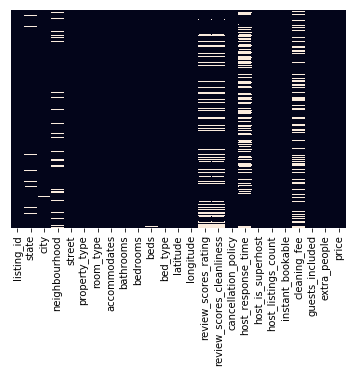

In [174]:
# heatmap shows the null values
sns.heatmap(listings_df_selected_col.isnull(),yticklabels=False,cbar=False)

###### Now we have cleaned data

In [175]:
# Every row have null values so we cannot delete that initially.
# So select the columns needed and delete the null values

listings_df_dropna = listings_df_selected_col.dropna()
listings_df_dropna

,listing_id,state,city,neighbourhood,street,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,cancellation_policy,host_response_time,host_is_superhost,host_listings_count,instant_bookable,cleaning_fee,guests_included,extra_people,price
5,162809,Dublin,Dublin,Blackrock,"Dublin, Dublin, Ireland",Townhouse,Private room,6,1.5,2.0,...,10.0,moderate,within a few hours,t,2.0,f,$0.00,2,$30.00,55.0
14,246560,Dublin,Dublin,Portobello,"Dublin, Dublin, Ireland",Townhouse,Private room,2,1.0,1.0,...,8.0,moderate,within a few hours,f,3.0,f,$30.00,1,$25.00,59.0
15,254941,Dublin,Blackrock,Blackrock,"Blackrock, Dublin, Ireland",House,Private room,2,1.5,1.0,...,10.0,moderate,within a few hours,t,2.0,f,$10.00,1,$15.00,50.0
20,275425,Dublin,Sandymount,Sandymount,"Sandymount, Dublin, Ireland",House,Entire home/apt,6,3.0,2.0,...,10.0,strict_14_with_grace_period,within a day,f,1.0,t,$45.00,4,$15.00,248.0
22,302554,County Dublin,Dublin,City Centre,"Dublin, County Dublin, Ireland",Apartment,Entire home/apt,5,1.0,1.0,...,10.0,moderate,within an hour,f,8.0,t,$40.00,3,$10.00,180.0
23,302634,County Dublin,Dublin,City Centre,"Dublin, County Dublin, Ireland",Apartment,Entire home/apt,2,1.0,1.0,...,9.0,moderate,within an hour,f,8.0,t,$25.00,2,$0.00,100.0
26,345398,County Dublin,Stillorgan,Blackrock,"Stillorgan, County Dublin, Ireland",House,Private room,2,1.5,1.0,...,9.0,moderate,within a few hours,t,2.0,f,$10.00,1,$15.00,50.0
27,365854,County Dublin,Dublin,North City Central/O'Connell Street,"Dublin, County Dublin, Ireland",Apartment,Entire home/apt,3,1.0,1.0,...,10.0,strict_14_with_grace_period,a few days or more,f,0.0,f,$69.00,1,$20.00,85.0
28,374792,County Dublin,Dublin,Inchicore,"Dublin, County Dublin, Ireland",Apartment,Entire home/apt,4,1.0,1.0,...,9.0,strict_14_with_grace_period,within a few hours,f,5.0,f,$50.00,3,$0.00,135.0
29,386860,County Dublin,Dublin,Old City,"Dublin, County Dublin, Ireland",House,Entire home/apt,4,1.0,2.0,...,9.0,moderate,within an hour,f,2.0,f,$75.00,3,$25.00,150.0


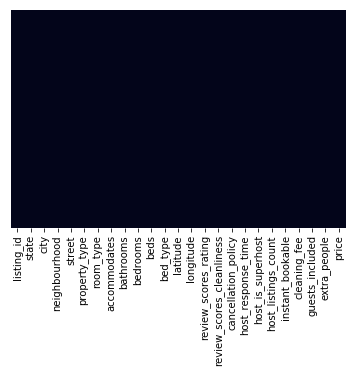

In [176]:
# heatmap shows dataset with no null values
sns.heatmap(listings_df_dropna.isnull(),yticklabels=False,cbar=False)

# Checking Price Affordability by using Logistic Regression

#####  If the price is less than the avg_price, then the affordability of lodging is 1 that means its affordable.If the price is greater then the avg_price , then the affordability is 0 that means its expensive.

###### 1.  Doing a groupby and calculating average price for each group

In [177]:
# groupby based on columns 'bedrooms','bathrooms' and 'accommodataes' and calculating the mean price for each group
# we need to reset index
# And change the name from price to avg_price
groupby_rooms_new = listings_df_dropna.groupby(['bedrooms','bathrooms','accommodates'])['price'].mean().round(0).reset_index(name='avg_price')
groupby_rooms_new


,bedrooms,bathrooms,accommodates,avg_price
0,0.0,0.5,1,43.0
1,0.0,1.0,1,155.0
2,0.0,1.0,2,111.0
3,0.0,1.0,3,88.0
4,0.0,1.0,4,103.0
5,0.0,1.5,2,68.0
6,1.0,0.0,1,100.0
7,1.0,0.0,2,53.0
8,1.0,0.5,1,45.0
9,1.0,0.5,2,61.0


###### 2.  Combining the cleaned data   'listings_df_dropna'   with the groupby data   'groupby_rooms_new'

In [178]:
listings_df_merged_new = pd.merge(listings_df_dropna, groupby_rooms_new, on=['bedrooms','bathrooms','accommodates'], how='left')
listings_df_merged_new

,listing_id,state,city,neighbourhood,street,property_type,room_type,accommodates,bathrooms,bedrooms,...,cancellation_policy,host_response_time,host_is_superhost,host_listings_count,instant_bookable,cleaning_fee,guests_included,extra_people,price,avg_price
0,162809,Dublin,Dublin,Blackrock,"Dublin, Dublin, Ireland",Townhouse,Private room,6,1.5,2.0,...,moderate,within a few hours,t,2.0,f,$0.00,2,$30.00,55.0,159.0
1,246560,Dublin,Dublin,Portobello,"Dublin, Dublin, Ireland",Townhouse,Private room,2,1.0,1.0,...,moderate,within a few hours,f,3.0,f,$30.00,1,$25.00,59.0,86.0
2,254941,Dublin,Blackrock,Blackrock,"Blackrock, Dublin, Ireland",House,Private room,2,1.5,1.0,...,moderate,within a few hours,t,2.0,f,$10.00,1,$15.00,50.0,67.0
3,275425,Dublin,Sandymount,Sandymount,"Sandymount, Dublin, Ireland",House,Entire home/apt,6,3.0,2.0,...,strict_14_with_grace_period,within a day,f,1.0,t,$45.00,4,$15.00,248.0,183.0
4,302554,County Dublin,Dublin,City Centre,"Dublin, County Dublin, Ireland",Apartment,Entire home/apt,5,1.0,1.0,...,moderate,within an hour,f,8.0,t,$40.00,3,$10.00,180.0,122.0
5,302634,County Dublin,Dublin,City Centre,"Dublin, County Dublin, Ireland",Apartment,Entire home/apt,2,1.0,1.0,...,moderate,within an hour,f,8.0,t,$25.00,2,$0.00,100.0,86.0
6,345398,County Dublin,Stillorgan,Blackrock,"Stillorgan, County Dublin, Ireland",House,Private room,2,1.5,1.0,...,moderate,within a few hours,t,2.0,f,$10.00,1,$15.00,50.0,67.0
7,365854,County Dublin,Dublin,North City Central/O'Connell Street,"Dublin, County Dublin, Ireland",Apartment,Entire home/apt,3,1.0,1.0,...,strict_14_with_grace_period,a few days or more,f,0.0,f,$69.00,1,$20.00,85.0,113.0
8,374792,County Dublin,Dublin,Inchicore,"Dublin, County Dublin, Ireland",Apartment,Entire home/apt,4,1.0,1.0,...,strict_14_with_grace_period,within a few hours,f,5.0,f,$50.00,3,$0.00,135.0,136.0
9,386860,County Dublin,Dublin,Old City,"Dublin, County Dublin, Ireland",House,Entire home/apt,4,1.0,2.0,...,moderate,within an hour,f,2.0,f,$75.00,3,$25.00,150.0,165.0


###### 3.  Using numpy where condition we are calculating the Affordability of each listing_id.  If price >= average price then Affordability = 0  (Expensive)  otherwise Affordabilityn = 1  (Affordable).  Created another columns named  'Affordability.

In [179]:
listings_df_merged_new['Affordability'] = np.where(listings_df_merged_new['price'] >= listings_df_merged_new['avg_price'], 0 , 1)
listings_df_merged_new

,listing_id,state,city,neighbourhood,street,property_type,room_type,accommodates,bathrooms,bedrooms,...,host_response_time,host_is_superhost,host_listings_count,instant_bookable,cleaning_fee,guests_included,extra_people,price,avg_price,Affordability
0,162809,Dublin,Dublin,Blackrock,"Dublin, Dublin, Ireland",Townhouse,Private room,6,1.5,2.0,...,within a few hours,t,2.0,f,$0.00,2,$30.00,55.0,159.0,1
1,246560,Dublin,Dublin,Portobello,"Dublin, Dublin, Ireland",Townhouse,Private room,2,1.0,1.0,...,within a few hours,f,3.0,f,$30.00,1,$25.00,59.0,86.0,1
2,254941,Dublin,Blackrock,Blackrock,"Blackrock, Dublin, Ireland",House,Private room,2,1.5,1.0,...,within a few hours,t,2.0,f,$10.00,1,$15.00,50.0,67.0,1
3,275425,Dublin,Sandymount,Sandymount,"Sandymount, Dublin, Ireland",House,Entire home/apt,6,3.0,2.0,...,within a day,f,1.0,t,$45.00,4,$15.00,248.0,183.0,0
4,302554,County Dublin,Dublin,City Centre,"Dublin, County Dublin, Ireland",Apartment,Entire home/apt,5,1.0,1.0,...,within an hour,f,8.0,t,$40.00,3,$10.00,180.0,122.0,0
5,302634,County Dublin,Dublin,City Centre,"Dublin, County Dublin, Ireland",Apartment,Entire home/apt,2,1.0,1.0,...,within an hour,f,8.0,t,$25.00,2,$0.00,100.0,86.0,0
6,345398,County Dublin,Stillorgan,Blackrock,"Stillorgan, County Dublin, Ireland",House,Private room,2,1.5,1.0,...,within a few hours,t,2.0,f,$10.00,1,$15.00,50.0,67.0,1
7,365854,County Dublin,Dublin,North City Central/O'Connell Street,"Dublin, County Dublin, Ireland",Apartment,Entire home/apt,3,1.0,1.0,...,a few days or more,f,0.0,f,$69.00,1,$20.00,85.0,113.0,1
8,374792,County Dublin,Dublin,Inchicore,"Dublin, County Dublin, Ireland",Apartment,Entire home/apt,4,1.0,1.0,...,within a few hours,f,5.0,f,$50.00,3,$0.00,135.0,136.0,1
9,386860,County Dublin,Dublin,Old City,"Dublin, County Dublin, Ireland",House,Entire home/apt,4,1.0,2.0,...,within an hour,f,2.0,f,$75.00,3,$25.00,150.0,165.0,1


######  4.  Using seaborn (seaborn is a python datavisualization libary based on matplotlib) plotting the Affordable and Expensive lodgings count. Affordability = 1 means its below than average price, Affordability = 0 means its expensive.The Air bnb listing data have more affordable lodging(almost double that of expensive lodging).

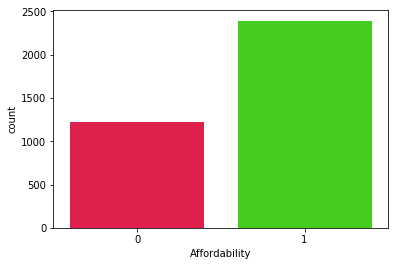

In [180]:
# Affordability = 1 means its Affordable(less than average price). 
# Affordability = 0 means its expensive
# Affordable lodgings count is almost double that of expensive lodging count
sns.countplot(x="Affordability",data=listings_df_merged_new,palette='prism_r')

  Affordability based on room_type

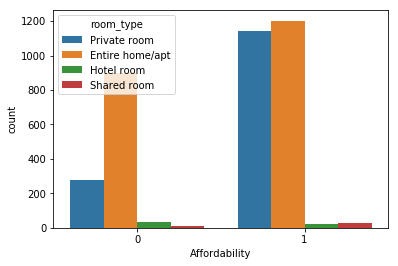

In [181]:
# private room and entire home/apt :- Affordable lodging count is high compared to expensive lodging count
# hotel rooms are mostly expensive.
sns.countplot(x="Affordability", hue="room_type", data=listings_df_merged_new)

Price histogram shows that most of the Air bnb lodging have price below $250

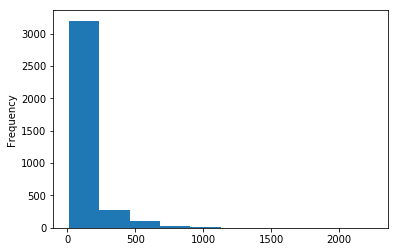

In [182]:
# most of the lodging have price less than 250
listings_df_merged_new["price"].plot.hist()

###### 5. From sklearn preprocessing library importing LabelEncoder and converting the data type of column 'room_type' from object to integer.Because for model prediction we need columns with int/float datatype.

In [183]:
# Preprocess
# Import label encoder 
from sklearn import preprocessing

# label_encoder object knows how to understand word labels 
label_encoder = preprocessing.LabelEncoder() 

In [184]:
listings_df_merged_new['room_type'].unique() 

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [185]:
print(listings_df_merged_new['room_type'].dtype)

object


In [186]:
# Encode labels in column 'room_type'. 
listings_df_merged_new['room_type'] = label_encoder.fit_transform(listings_df_merged_new['room_type']) 

listings_df_merged_new['room_type'].unique() 


array([2, 0, 1, 3], dtype=int64)

In [187]:
print(listings_df_merged_new['room_type'].dtype)

int32


###### 6. This dataframe is used for Train Test Split Method and Model Prediction by Logistic Regression 

In [188]:
# Now the data type of column 'room_type' is changed from object to integer.
listings_df_merged_new.head()

,listing_id,state,city,neighbourhood,street,property_type,room_type,accommodates,bathrooms,bedrooms,...,host_response_time,host_is_superhost,host_listings_count,instant_bookable,cleaning_fee,guests_included,extra_people,price,avg_price,Affordability
0,162809,Dublin,Dublin,Blackrock,"Dublin, Dublin, Ireland",Townhouse,2,6,1.5,2.0,...,within a few hours,t,2.0,f,$0.00,2,$30.00,55.0,159.0,1
1,246560,Dublin,Dublin,Portobello,"Dublin, Dublin, Ireland",Townhouse,2,2,1.0,1.0,...,within a few hours,f,3.0,f,$30.00,1,$25.00,59.0,86.0,1
2,254941,Dublin,Blackrock,Blackrock,"Blackrock, Dublin, Ireland",House,2,2,1.5,1.0,...,within a few hours,t,2.0,f,$10.00,1,$15.00,50.0,67.0,1
3,275425,Dublin,Sandymount,Sandymount,"Sandymount, Dublin, Ireland",House,0,6,3.0,2.0,...,within a day,f,1.0,t,$45.00,4,$15.00,248.0,183.0,0
4,302554,County Dublin,Dublin,City Centre,"Dublin, County Dublin, Ireland",Apartment,0,5,1.0,1.0,...,within an hour,f,8.0,t,$40.00,3,$10.00,180.0,122.0,0


# Train Test Split Method

Spliting data into two parts ie X and y.Taking independend variables 'room_type', 'accommodates', 'bedrooms', 'price' as X. And dependend variable 'Affordability' as y.Randomly take 80 percent data for training,then creating a model from that by using Logistic Regression,then testing the model we have created on the remaining test data(20 percent).Then we will get accuracy of the model.The accuracy score should be within 0 to 1. The more accurate our model when its closer to 1.


In [189]:
# X independent variable, y dependent variable
X = listings_df_merged_new[['room_type','accommodates','bedrooms','price']]
y = listings_df_merged_new.Affordability

In [190]:
# train_test_split method for predicting the accuracy of the model we have created
from sklearn.model_selection import train_test_split

In [191]:
# 80 percent data is used for training the model and 20 percent data used for testing the model.
# Give any value to random_state to get same result while running every time
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression

Any process that attempts to find relationships between variables is called regression.Logistic regression is used when the dependent variable is binary in nature. Affordability is our dependent variable and its binary in nature.We can predict the  'Affordability'  by using Logistic Regression.Here the output is binary or in the form of 0/1.The value of 'Affordability' equal to 0 means our lodging is expensive otherwise our lodging is affordable.

In [193]:
# created model
price_model = LogisticRegression()

In [194]:
# Fitting the trained X and y data into our model
price_model.fit(X_train,y_train)

C:\Users\iamso\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [195]:
predictions = price_model.predict(X_test)

The classification report visualizer displays the precision, recall, F1, and support scores for the model.

In [196]:
from sklearn.metrics import classification_report

In [197]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.62      0.70       231\n           1       0.84      0.93      0.88       492\n\n   micro avg       0.83      0.83      0.83       723\n   macro avg       0.82      0.77      0.79       723\nweighted avg       0.83      0.83      0.82       723\n'

A confusion matrix is a table used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known

In [198]:
from sklearn.metrics import confusion_matrix

we can calculate the accuracy score from confusion_matrix  143+458/(143+88+34+458) = 0.83125 

In [199]:
confusion_matrix(y_test,predictions)

array([[143,  88],
       [ 34, 458]], dtype=int64)

To predict the accuracy score of our price_model

In [200]:
from sklearn.metrics import accuracy_score

###### Accuracy score of  price_model is 0.83

In [201]:
accuracy_score(y_test,predictions)

0.8312586445366529

Our price_model is 83.125 percent accurate

In [202]:
accuracy_score(y_test,predictions)*100

83.12586445366529

###### Now you can predict with the model

Enter value for 'room_type',  'accomodates',  'bedrooms',  'price'   for price_model predicting

First position is for room_type, enter values => 0 for Entire home/apt, 1 for Hotel room , 2 for Private room, 3 for Shared room.  
Second position for accommodates
Third position for bedrooms
Fourth position for price

In [203]:
price_model.predict([[1,6,1,200]])

array([0])

In [204]:
price_model.predict([[1,6,3,200]])

array([1])

######  To save model

In [205]:
# save fitted model to file
import joblib
filename = 'price_affordability_check.sav'
joblib.dump(price_model, filename)

['price_affordability_check.sav']

In [206]:
# cleaned data is used for average price analysis based on room type and neighbourhood
listings_df_dropna.head()

,listing_id,state,city,neighbourhood,street,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,cancellation_policy,host_response_time,host_is_superhost,host_listings_count,instant_bookable,cleaning_fee,guests_included,extra_people,price
5,162809,Dublin,Dublin,Blackrock,"Dublin, Dublin, Ireland",Townhouse,Private room,6,1.5,2.0,...,10.0,moderate,within a few hours,t,2.0,f,$0.00,2,$30.00,55.0
14,246560,Dublin,Dublin,Portobello,"Dublin, Dublin, Ireland",Townhouse,Private room,2,1.0,1.0,...,8.0,moderate,within a few hours,f,3.0,f,$30.00,1,$25.00,59.0
15,254941,Dublin,Blackrock,Blackrock,"Blackrock, Dublin, Ireland",House,Private room,2,1.5,1.0,...,10.0,moderate,within a few hours,t,2.0,f,$10.00,1,$15.00,50.0
20,275425,Dublin,Sandymount,Sandymount,"Sandymount, Dublin, Ireland",House,Entire home/apt,6,3.0,2.0,...,10.0,strict_14_with_grace_period,within a day,f,1.0,t,$45.00,4,$15.00,248.0
22,302554,County Dublin,Dublin,City Centre,"Dublin, County Dublin, Ireland",Apartment,Entire home/apt,5,1.0,1.0,...,10.0,moderate,within an hour,f,8.0,t,$40.00,3,$10.00,180.0


### Calculating the Average Price for each room type and calculating the listing count for each room type and finding the preferred room type.


In [207]:
list_sort_room = listings_df_dropna.sort_values("room_type").reset_index(drop=True)
#list_sort_room

In [208]:
list_group_room = list_sort_room.groupby("room_type")
#list_group_room.head()

#### Calculating average price for each room type using matplotlib library.Hotel rooms have the highest average price and Shared rooms have lowest average price

In [209]:
Average_price_of_room_type = list_group_room.mean()["price"]
Average_price_of_room_type

room_type
Entire home/apt    172.648597
Hotel room         181.730769
Private room        74.330049
Shared room         51.657895
Name: price, dtype: float64

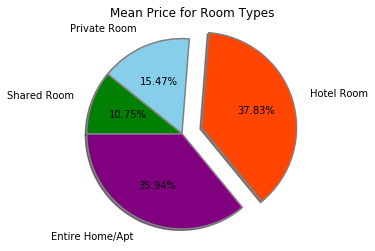

In [210]:
# BUILD PIE CHART 


plt.pie(Average_price_of_room_type, startangle=180, radius=1.4,
        colors=["Purple","orangered","skyblue","green"], explode=[0,0.30,0,0],
        labels=["Entire Home/Apt","Hotel Room","Private Room","Shared Room"], labeldistance=1.2,
        autopct="%1.2f%%", shadow=True,
        wedgeprops={"linewidth": 1.5, "edgecolor": "grey"})


plt.title("Mean Price for Room Types")
plt.axis("equal")

# SAVE FIGURE 
plt.savefig("OUTPUT_price/Average_price_for_room_types.png", bbox_inches="tight")

# SHOW FIGURE
plt.show()

# Hotel rooms have the highest average price and Shared rooms have lowest average price

###### Entire Home/apt is the most preffered room type and Shared rooms are the least preffered room type

In [211]:
# Preferred room type based on listing_id count
Number_of_listings_per_room_type = list_group_room["listing_id"].count()
Number_of_listings_per_room_type

room_type
Entire home/apt    2103
Hotel room           52
Private room       1421
Shared room          38
Name: listing_id, dtype: int64

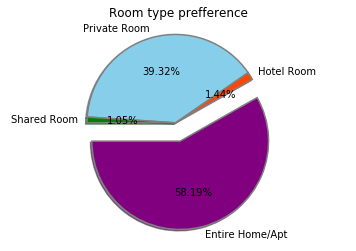

In [212]:
# BUILD PIE CHART 


plt.pie(Number_of_listings_per_room_type, startangle=180, radius=1.4,
        colors=["Purple","orangered","skyblue","green"], explode=[0.30,0,0,0],
        labels=["Entire Home/Apt","Hotel Room","Private Room","Shared Room"], labeldistance=1.1,
        autopct="%1.2f%%", shadow=True,
        wedgeprops={"linewidth": 1.5, "edgecolor": "grey"})


plt.title("Room type prefference")
plt.axis("equal")

# SAVE FIGURE 
plt.savefig("OUTPUT_price/Room_types_prefference.png", bbox_inches="tight")

# SHOW FIGURE
plt.show()

# Entire Home/apt is the most preffered room type

### Calculating the average price for each neighbourhood , finding the neighbourhoods which have low and high average price and calculating the listing count based on neighbourhood.

In [213]:
list_sort_neighbourhood = listings_df_dropna.sort_values("neighbourhood").reset_index(drop=True)
#list_sort_neighbourhood

In [214]:
list_groupby_neighbourhood = list_sort_neighbourhood.groupby("neighbourhood")
#list_groupby_neighbourhood.head()

###### Calculating the average price for each neighbourhood

In [215]:
Average_price_neighbourhood = list_groupby_neighbourhood.mean()["price"]
Average_price_neighbourhood.head()

neighbourhood
Addison Park    154.466667
Ardilea          90.800000
Artane           56.829787
Ballinteer       73.285714
Ballsbridge     193.388235
Name: price, dtype: float64

In [216]:
print(type(Average_price_neighbourhood))

<class 'pandas.core.series.Series'>


In [217]:
# creating dataframe
neighbourhood_df = pd.DataFrame(Average_price_neighbourhood).reset_index(drop=False).rename(columns={"price":"avg_price"})
neighbourhood_df.head()

,neighbourhood,avg_price
0,Addison Park,154.466667
1,Ardilea,90.800000
2,Artane,56.829787
3,Ballinteer,73.285714
4,Ballsbridge,193.388235


###### Using filter finding the Neighbourhood which have High Average Price.Temple bar is the neighbourhood with highest average price.Average price of Temple bar is 232.7

In [218]:
neighbourhood_high_avg_price = neighbourhood_df[neighbourhood_df["avg_price"] > 175]
neighbourhood_high_avg_price

,neighbourhood,avg_price
4,Ballsbridge,193.388235
29,Georgian Quarter,208.242857
34,Inchicore,180.166667
52,Rathgar,185.081081
60,Temple Bar,232.705263


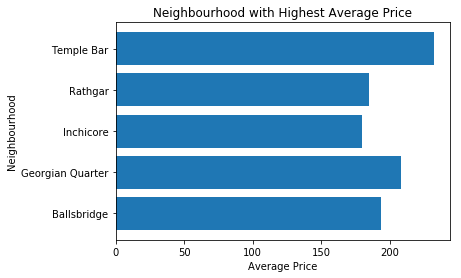

In [219]:
plt.title("Neighbourhood with Highest Average Price")
plt.barh(neighbourhood_high_avg_price.neighbourhood, neighbourhood_high_avg_price.avg_price)
plt.xlabel("Average Price")
plt.ylabel("Neighbourhood")
# SAVE FIGURE 
plt.savefig("OUTPUT_price/Neighbourhood with Highest Average Prices.png", bbox_inches="tight")
# Temple Bar have the highest average price

###### Using filter finding the Neighbourhood which have Low Average Price.Bonnybrook/Darndale is the neighbourhood with lowestaverage.The average price of Bonnybrook/Darndale is 46.1

In [220]:
neighbourhood_low_avg_price = neighbourhood_df[neighbourhood_df["avg_price"] < 60]
neighbourhood_low_avg_price

,neighbourhood,avg_price
2,Artane,56.829787
10,Bonnybrook/Darndale,46.117647
16,Clondalkin,59.920000
31,Grace Park,54.333333
38,Knocklyon,55.166667


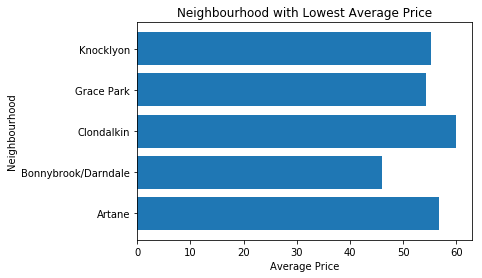

In [221]:
plt.title("Neighbourhood with Lowest Average Price")
plt.barh(neighbourhood_low_avg_price.neighbourhood, neighbourhood_low_avg_price.avg_price)
plt.xlabel("Average Price")
plt.ylabel("Neighbourhood")
# SAVE FIGURE 
plt.savefig("OUTPUT_price/Neighbourhood with Lowest Average Prices.png", bbox_inches="tight")
# Bonnybrook/Darndale have lowest average price

###### Calculating the listing count for each neighbourhood.Finding the most preffered neighbourhood and least preffered neighbourhood.

In [222]:
neighbourhood_listing_id_count = list_groupby_neighbourhood["listing_id"].count()
neighbourhood_listing_id_count.head()
#print(type(Average_price_neighbourhood))

neighbourhood
Addison Park     15
Ardilea          15
Artane           47
Ballinteer        7
Ballsbridge     170
Name: listing_id, dtype: int64

In [223]:
neighbourhood_listing_id_count_df = pd.DataFrame(neighbourhood_listing_id_count).reset_index(drop=False)
#neighbourhood_listing_id_count_df.head()

###### City Centre is the most preffered neighbourhood.It have listing count of 459.

In [224]:
neighbourhood_more_listing = neighbourhood_listing_id_count_df[neighbourhood_listing_id_count_df["listing_id"] > 150]
#neighbourhood_more_listing

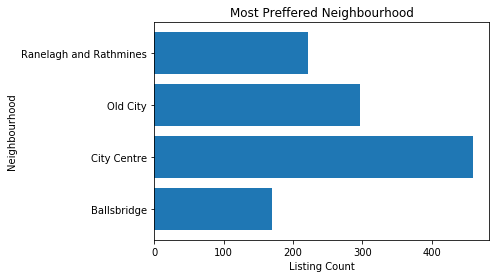

In [225]:
plt.title("Most Preffered Neighbourhood")
plt.barh(neighbourhood_more_listing.neighbourhood, neighbourhood_more_listing.listing_id)
plt.xlabel("Listing Count")
plt.ylabel("Neighbourhood")
# SAVE FIGURE 
plt.savefig("OUTPUT_price/Most Preffered Neighbourhood.png", bbox_inches="tight")
# City centre is the most preffered Neighbourhood

###### Islandbridge is the least preffered neighbourhood.It have only 1 listing.

In [226]:
neighbourhood_less_listing = neighbourhood_listing_id_count_df[neighbourhood_listing_id_count_df["listing_id"] < 8]
#neighbourhood_less_listing

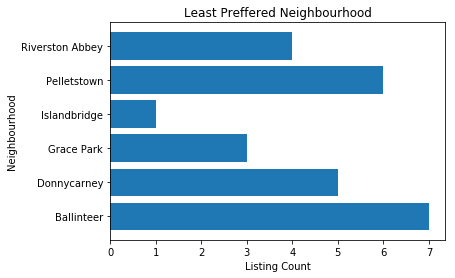

In [227]:
plt.title("Least Preffered Neighbourhood")
plt.barh(neighbourhood_less_listing.neighbourhood, neighbourhood_less_listing.listing_id)
plt.xlabel("Listing Count")
plt.ylabel("Neighbourhood")
# SAVE FIGURE 
plt.savefig("OUTPUT_price/Least Preffered Neighbourhood.png", bbox_inches="tight")
# Islandbridge is the least preffered Neighbourhood